Using device: cuda

Final Metrics:
MSE: 173754937.0655
MAE: 9516.8835
RMSE: 13181.6136
MAPE: 2.4705


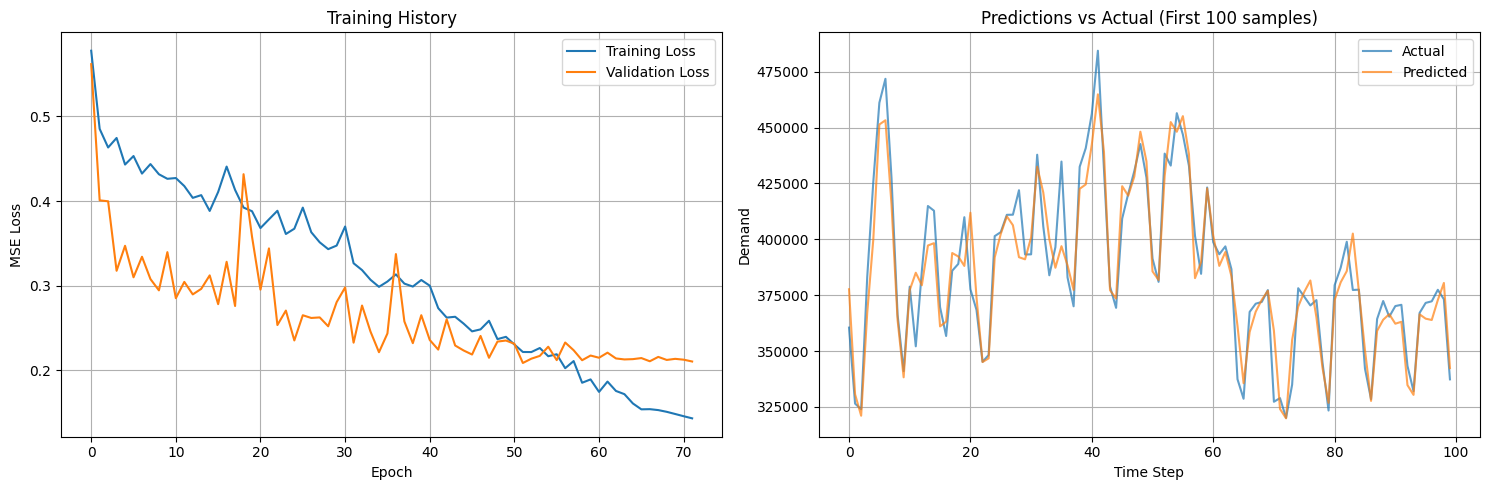

In [ ]:
#imports
import sys
sys.path.append('/home/harry/personal/uni/project/individual/harry/model')
from model import *

params = {
        'learning_rate': 0.002,
        'batch_size': 16,
        'seq_length': 14,
        'transformer_encoder_layer_params': {
            'd_model': 64,
            'nhead': 4,
            'dim_feedforward': 276,
            'dropout': 0.0579,
            'activation': 'relu'
        },
        'transformer_layer_params': {
            'num_layers': 3,
        },
        'dataset': '2016-2019',
        'train_test_split': '80:20',
        'features': ['sum_30_min_demand', 'avg_temp'],
    }

input_dim = len(params['features'])

sequences, targets, datetimes, scaler = prepare_data(params)


model, train_losses, val_losses = train_transformer_model(
    sequences.numpy(), targets.numpy(), input_dim, datetimes, params
)

postprocess(model, sequences, targets, scaler, train_losses, val_losses)
